Image as an array: 
 [[[175 202 241]
  [177 205 247]
  [176 205 247]
  ...
  [176 205 247]
  [176 205 247]
  [176 205 247]]

 [[177 206 247]
  [178 209 255]
  [178 209 255]
  ...
  [178 209 255]
  [178 209 255]
  [178 209 255]]

 [[176 205 247]
  [178 209 255]
  [178 209 255]
  ...
  [178 209 255]
  [178 209 255]
  [178 209 255]]

 ...

 [[176 205 247]
  [178 209 255]
  [178 209 255]
  ...
  [178 209 255]
  [178 209 255]
  [178 209 255]]

 [[176 205 247]
  [178 209 255]
  [178 209 255]
  ...
  [178 209 255]
  [178 209 255]
  [178 209 255]]

 [[176 205 247]
  [178 209 255]
  [178 209 255]
  ...
  [178 209 255]
  [178 209 255]
  [178 209 255]]] 

The image itself: 


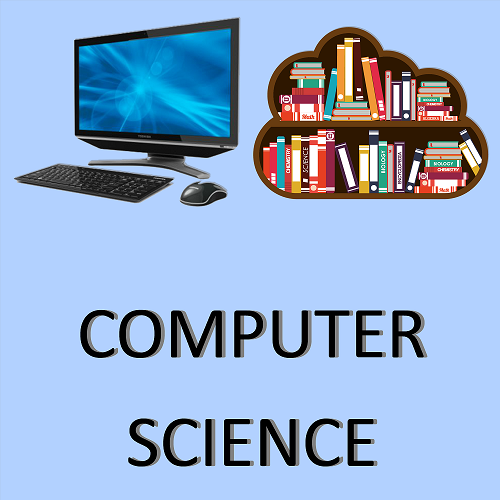

In [1]:
from PIL import Image
import numpy as np
zz = Image.open('photo_sample.png').convert('RGB')
im_array = np.array(zz)
print("Image as an array: \n",im_array,"\n")
print("The image itself: ")
display(zz)

Grey-scale array: 
 [[206.         209.66666667 209.33333333 ... 209.33333333 209.33333333
  209.33333333]
 [210.         214.         214.         ... 214.         214.
  214.        ]
 [209.33333333 214.         214.         ... 214.         214.
  214.        ]
 ...
 [209.33333333 214.         214.         ... 214.         214.
  214.        ]
 [209.33333333 214.         214.         ... 214.         214.
  214.        ]
 [209.33333333 214.         214.         ... 214.         214.
  214.        ]] 



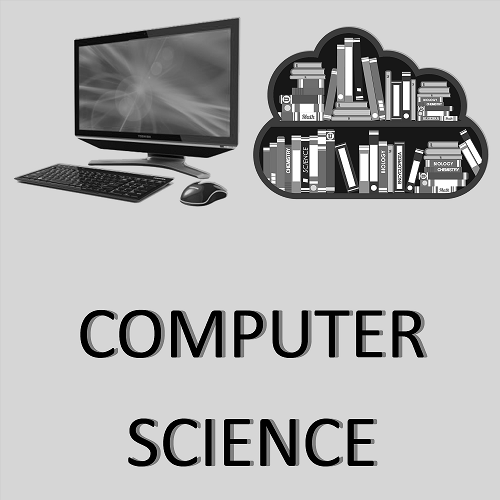

In [3]:

im_grey = np.zeros((im_array.shape[0],im_array.shape[1]))
im1_grey = np.sum(im_array,axis=2)* (1/3)
print("Grey-scale array: \n",im1_grey, "\n")

im_photo = Image.fromarray(np.uint8(im1_grey)).convert('RGB')
display(im_photo)

In [4]:
print("RGB shape: ", im_array.shape)
print("Grey-scale shape: ",im1_grey.shape)

RGB shape:  (500, 500, 3)
Grey-scale shape:  (500, 500)


In [6]:
from itertools import chain

def convolute(matrix,kernel):
    m = len(matrix)
    n = len(matrix[0])
    matrix_n = np.array(matrix)
    result = np.zeros((m-2,n-2)).tolist()
    for i in range(m-2):
        for j in range(n-2):
            temp_copy = matrix_n[i:i+3, j:j+3].tolist()
            temp_res = [[a*b for a, b in zip(ii, jj)] for ii, jj in zip(temp_copy, kernel)]
            result[i][j] = sum(list(chain.from_iterable(temp_res)))
    return result

image_small = Image.open('photo_sample.png').convert('RGB')
small_array = np.array(image_small)

small_grey = np.zeros((small_array.shape[0],small_array.shape[1]))
small_grey = np.sum(small_array,axis=2)* (1/3)



gx = [[-1,-2,-1],[0,0,0],[1,2,1]]
gy = [[-1,0,1],[-2,0,2],[-1,0,1]]

edges_x = np.array(convolute(small_grey, gx))
edges_y = np.array(convolute(small_grey, gy))

edges = edges_x + edges_y

print("Edge detection is done !")

Edge detection is done !


X edges


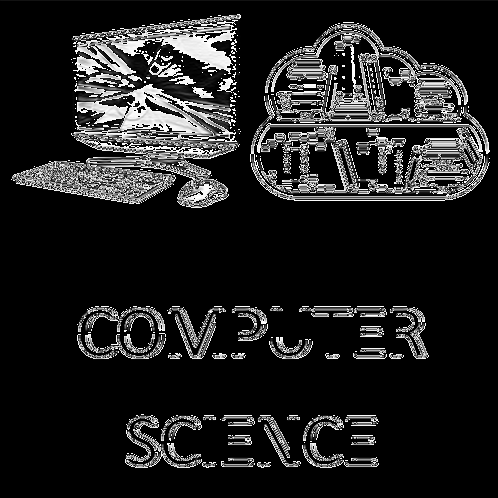

In [7]:
print("X edges")
edges_Sobel_x = Image.fromarray(np.uint8(edges_x)).convert('RGB')
display(edges_Sobel_x)


Y edges


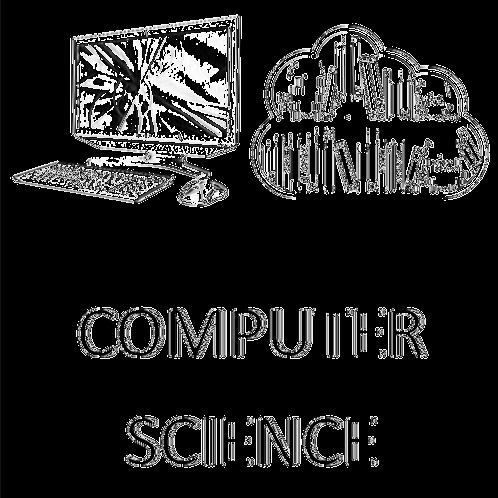

In [8]:
print("\nY edges")
edges_Sobel_y = Image.fromarray(np.uint8(edges_y)).convert('RGB')
display(edges_Sobel_y)


X+Y edges


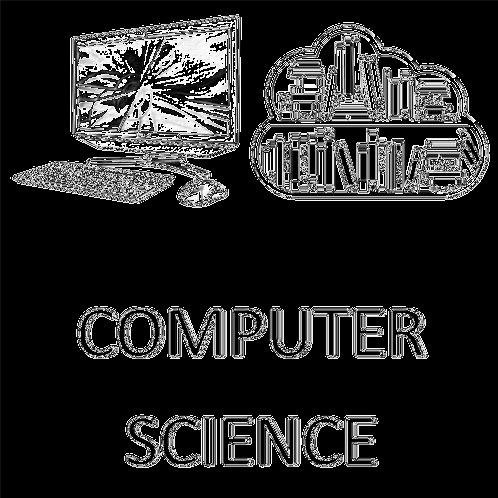

In [9]:
print("\nX+Y edges")
edges_Sobel = Image.fromarray(np.uint8(edges)).convert('RGB')
display(edges_Sobel)